# Problem description

$\textbf{In the following problem an agent has to escape from any room (e.g. 1, 2, 3, 4, or 5) to the outside of the the house (0).}$
$\textbf{ The environment is described in the following} $

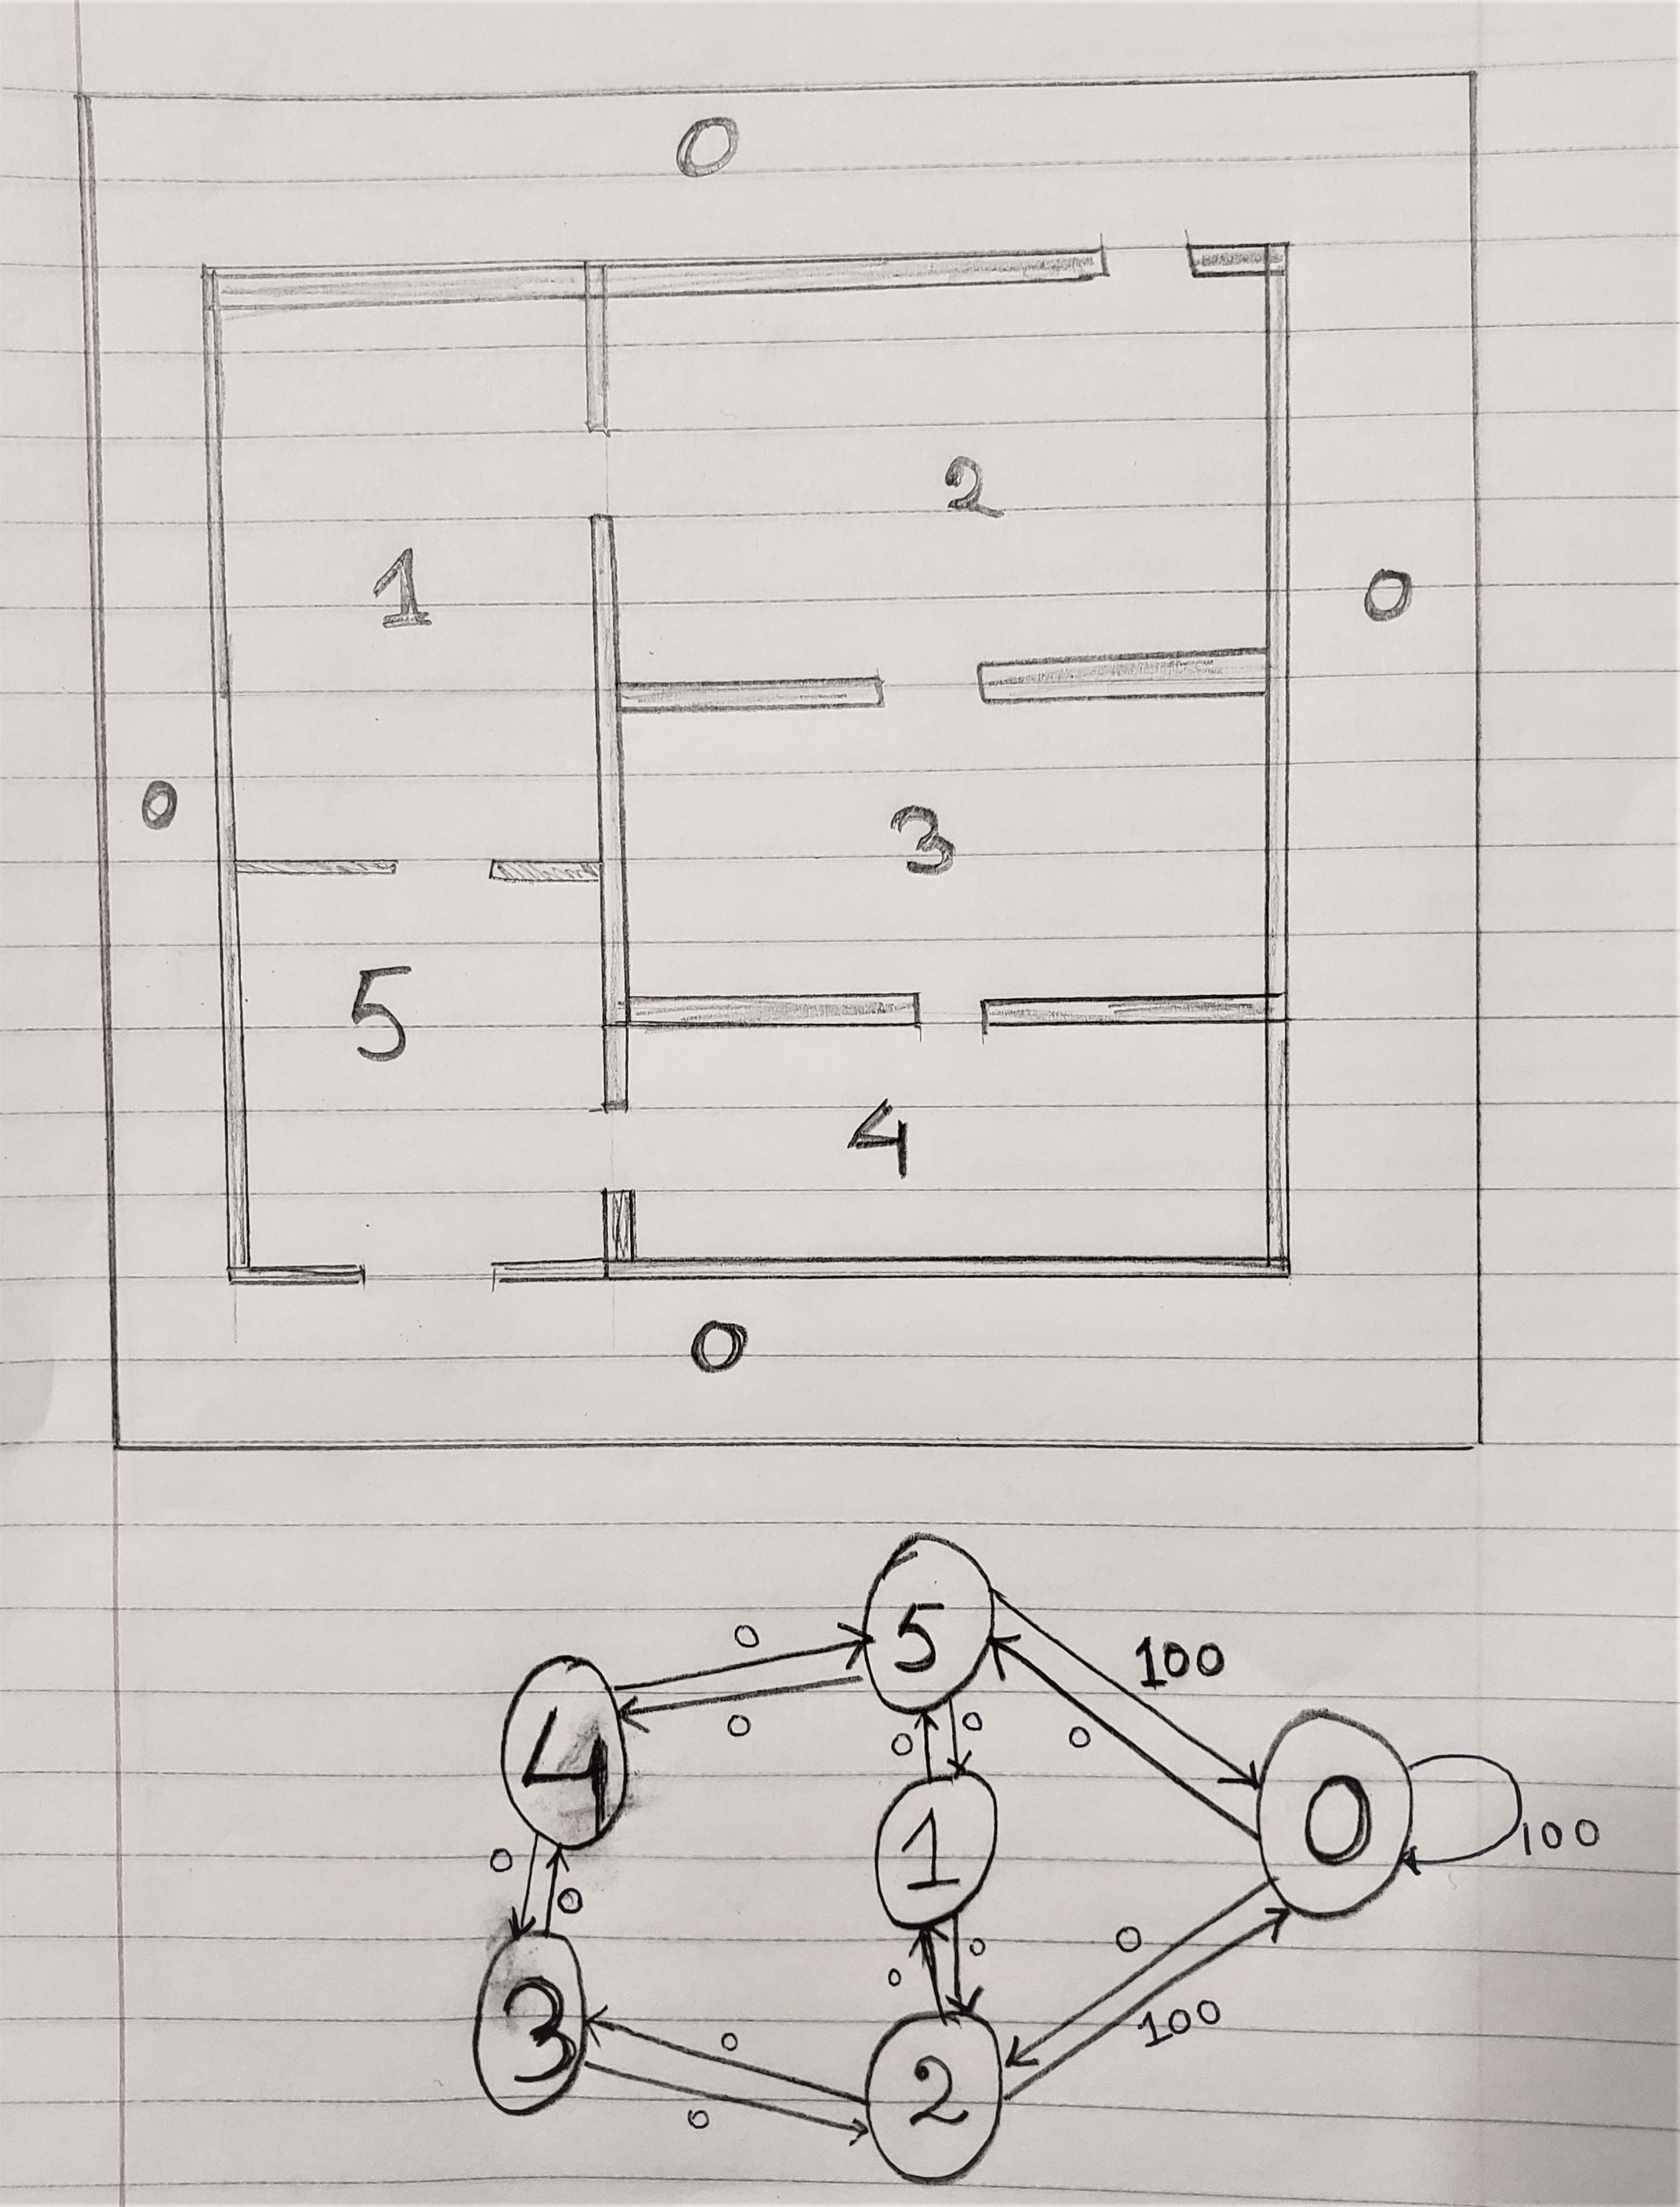

In [1]:
from IPython.display import Image
Image("Problem.jpg")

In [2]:
import numpy as np

# Define the environment and construct the R matrix

In [3]:
environment = [(0,5), (0,2), (2,1), (2,3), (1,5), (5,4), (4,3)]
n_states= 6
goal=0

#initial R matrix with all -1 
#-1 are the values for the forbidden links for e.g. (5,3) 

R= np.matrix(np.ones(shape=[n_states,n_states]))*(-1)

for row in environment:
    R[row]=0
    if row[1]== goal:
        R[row]= 100
    row = row[:: -1]
    R[row]= 0
    
R[goal, goal]= 100

Q= np.matrix(np.zeros(shape=[n_states,n_states]))

print("Reward matrix R : \n", R)
print("initial Q matrix: \n", Q)

Reward matrix R : 
 [[100.  -1.   0.  -1.  -1.   0.]
 [ -1.  -1.   0.  -1.  -1.   0.]
 [  0.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.   0.]
 [  0.   0.  -1.  -1.   0.  -1.]]
initial Q matrix: 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


# Initial structure for the problem

In [4]:
current_state= 1

def available_action(state):
    current_state_row= R[state,]
    avl_act= np.where(current_state_row >= 0)[1]
    return avl_act

available_actions = available_action(current_state)
#print(available_actions)

def sample_random_action(actions):
    action = np.random.choice(actions)
    return action


sample_action = sample_random_action(available_actions)


# define the hyper parameter Gamma
gamma = 0.8

# Define our Q-update function
#Q[state,action] = R[state,action] + gamma * Max(Q[next state,all_actions])

def update_Q(current_state, action, gamma):
    max_Q= np.max(Q[action, ])
    Q[current_state,action] = R[current_state,action] + gamma * max_Q
    return Q


update_Q(current_state, sample_action, gamma)



matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

# Training : re-iterate the process above many times

In [5]:
for i in range(10000):
    current_state=  np.random.choice([0,1,2,3,4,5])
    available_actions = available_action(current_state)
    sample_action = sample_random_action(available_actions)
    update_Q(current_state, sample_action, gamma)
    
#normalize Q

Q= (Q/np.max(Q))*100
print("modified Q matrix: \n", Q)

modified Q matrix: 
 [[100.    0.   64.    0.    0.   64. ]
 [  0.    0.   64.    0.    0.   64. ]
 [ 80.   51.2   0.   51.2   0.    0. ]
 [  0.    0.   64.    0.   51.2   0. ]
 [  0.    0.    0.   51.2   0.   64. ]
 [ 80.   51.2   0.    0.   51.2   0. ]]


# Testing

In [6]:
current_state = 1
steps = []
steps.append(current_state)

while current_state != goal:
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    steps.append(next_step_index[0])
    #print(next_step_index)

    
    if len(next_step_index) >1: #if there are more than one options choose any one
        next_step_index= np.random.choice(next_step_index)
        
    else:
        next_step_index=  next_step_index
        
    current_state = next_step_index
        
print("An efficient path from state {} is {}".format(steps[0],steps))

An efficient path from state 1 is [1, 2, 0]
